What company would you like to simulate? (AAPL, AMZN, or GOOG): GOOG
How many simulations would you like to run? Answer must be greater than 0: 50


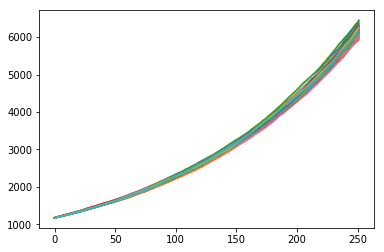

Do you want to run another simulation? (N to exit, anything else to continue): Y
What company would you like to simulate? (AAPL, AMZN, or GOOG): AMZN
How many simulations would you like to run? Answer must be greater than 0: 50


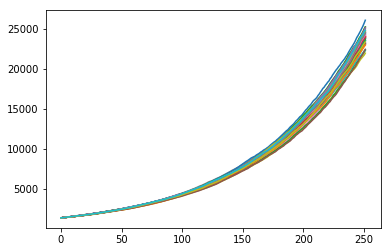

Do you want to run another simulation? (N to exit, anything else to continue): H
What company would you like to simulate? (AAPL, AMZN, or GOOG): AAPL
How many simulations would you like to run? Answer must be greater than 0: 100


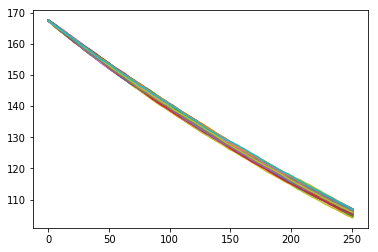

Do you want to run another simulation? (N to exit, anything else to continue): Y
What company would you like to simulate? (AAPL, AMZN, or GOOG): Asd
This was an invalid response. Please run the program again and enter an acceptable company.
Do you want to run another simulation? (N to exit, anything else to continue): y
What company would you like to simulate? (AAPL, AMZN, or GOOG): AAPL
How many simulations would you like to run? Answer must be greater than 0: -1
This was an invalid number of simulations. Please run the program again and enter an acceptable value.
Do you want to run another simulation? (N to exit, anything else to continue): AAPL
What company would you like to simulate? (AAPL, AMZN, or GOOG): AAPL
How many simulations would you like to run? Answer must be greater than 0: 0
This was an invalid number of simulations. Please run the program again and enter an acceptable value.
Do you want to run another simulation? (N to exit, anything else to continue): N
Thanks for sim

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# This function takes a ticker symbol and loads a data frame
# with the data stored in a CSV file in the current directory.

def get_data_from_file(ticker):
    f_name = ticker + ".csv"
    df = pd.read_csv(f_name, delimiter=",")
    return df

# This function returns Mu, the average, relative daily Adj Close change
def getMuAndSigma(ticker):
    data = get_data_from_file(ticker)
    dailyAdjClose = data['Adj Close']
    relativeChange = []
    DiffFromMean = []
    # Iterates through the Adj Close daily values, computes the relative change between each day and enters it into a list
    for i in range(len(dailyAdjClose)):
        if i == 0:
            continue
        relativeChange.append((dailyAdjClose[i]-dailyAdjClose[i-1])/dailyAdjClose[i-1])
    #compute Mu
    Mu = compute_average(relativeChange)

    #Computing Sigma- 3ish steps
    #Rel Change-Mu
    for j in range(len(relativeChange)):
        DiffFromMean.append((relativeChange[j] - Mu)**2)
    #Add Those Values Up
    sum = 0
    for num in DiffFromMean:
        sum += num
    Sigma = (sum/(len(DiffFromMean)-1))**.5

    return Mu, Sigma

#This function simulates one daily random walk
def random_daily_return(s, mu, sigma):
    R = np.random.uniform(0,1)
    delta = (s*mu) +(s*mu*R)
    return s + delta
#Returns a list of the next 252 predicted stock prices
def random_stock_year(ticker, numDays, Mu, Sigma):
    #Get's all the data needed to call random daily return
    data = get_data_from_file(ticker)
    closePrice = data['Adj Close']
    oldStockPrice = closePrice[len(closePrice)-1]
    #Loops through, calling the previous stock price in random_daily_return, adding it to a list
    count = 0
    stockYear = []
    while count < numDays:
        newStockPrice = random_daily_return(oldStockPrice, Mu, Sigma)
        stockYear.append(newStockPrice)
        count += 1
        oldStockPrice = newStockPrice

    return stockYear

# This function computes the average value for a list of numbers.
def compute_average(num_list):

    count = len(num_list)
    total = 0

    for i in range(0,count):
        total = total + num_list[i]

    avg = total/count

    return avg


if __name__ == '__main__':


    running = True

    while running:
        TickerFile = input("What company would you like to simulate? (AAPL, AMZN, or GOOG): ")
        count = 0

        if TickerFile == "AAPL" or TickerFile == "AMZN" or TickerFile == "GOOG":
            numSims = int(input("How many simulations would you like to run? Answer must be greater than 0: "))
            MuAndSigma = getMuAndSigma(TickerFile)
            if numSims == 0 or numSims < 0:
                print("This was an invalid number of simulations. Please run the program again and enter an acceptable value.")
            else:
                while count < numSims:
                    l = random_stock_year(TickerFile, 252, MuAndSigma[0], MuAndSigma[1])
                    plt.plot(l)
                    count += 1
                plt.show()
        else:
            print("This was an invalid response. Please run the program again and enter an acceptable company.")

        goAgain = input("Do you want to run another simulation? (N to exit, anything else to continue): ")
        if goAgain == "N":
            print("Thanks for simulating. Bye Bye!!")
            running = False